In [1]:
import sisl as si
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Defining orbitals

Orbitals, and basis sets, is a complicated matter that requires a broader set of classes.
sisl enables one to use orbitals without information, atomic orbitals, and Gaussian/Slater type orbitals.

------

In this tutorial we will show how one can create different orbitals, and use them.

In [2]:
orb = si.Orbital(1.2, q0=1)
print(orb)

Orbital{R: 1.20000, q0: 1.0}


All orbitals will have some idea of its *range*. I.e. the effective range at which it acts on something. The ranges are used in `Geometry` objects to estimate which atoms interacts with other atoms, and as such they are the back-bone of tight-binding models.  
The above orbital has a range of 1.2 Ang, and an initial charge of 1 electron.

----

## Orbitals with spherical shapes

Many other orbitals has some shape in real space. Here we will explore two such orbitals in `sisl`.  
In this case we will populate the orbital with an exponential decaying shape (non-physical, but instructive).

Here we define the orbital range as the maximum `R` such that integral:
$$
\int^R |f(r)| dr
$$
contains $99\%$ of the function.

In [3]:
r = np.linspace(0, 3, 200)
f = np.exp(-2 * r**2)
sorb = si.SphericalOrbital(1, (r, f), R={"contains": 0.99})
print(sorb)

SphericalOrbital{l: 1, R: 1.2879999999999991, q0: 0.0}


Now we have a spherical orbital with $l=1$ quantum number. Lets plot its spherical form and its wavefunction:

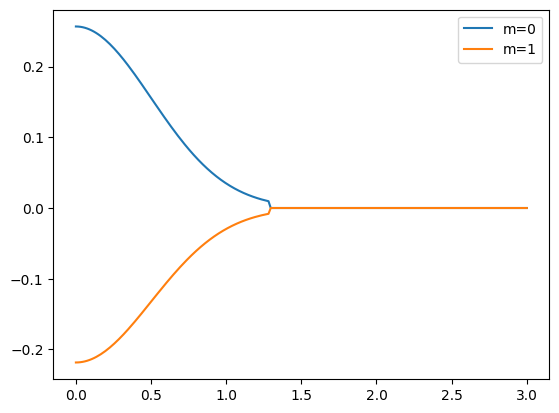

In [4]:
for m in (0, 1):
    # Plotting for theta = phi = 45 angles
    plt.plot(r, sorb.psi_spher(r, 45, 45, m=m), label=f"m={m}")
plt.legend();

Note how the wavefunction gets truncated at the orbital radius, based on the truncation optimization.

---

The `SphericalOrbital` is typically just a temporary orbital array used for creating proper atomic orbitals. Atomic orbitals contains relevant quantum numbers, but also a spherical function. The `AtomicOrbital` accepts many other possibilities of arguments, please refer to its documentation for detailed explanations.

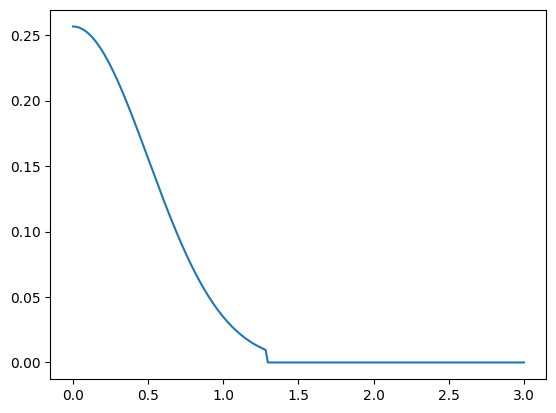

In [5]:
aorb = si.AtomicOrbital("pz", spherical=sorb)
plt.plot(r, aorb.psi_spher(r, 45, 45));

## Atoms with orbitals

Atoms are defined with 1 or more orbitals. To create an atom with a specific set of orbitals simply do: 

In [6]:
C = si.Atom(6, [sorb, aorb])
print(C)

Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.28800,
 SphericalOrbital{l: 1, R: 1.2879999999999991, q0: 0.0},
 AtomicOrbital{2pzZ1, q0: 0.0, SphericalOrbital{l: 1, R: 1.2879999999999991, q0: 0.0}}
}


This atom can then further be used in `Geometry` creations.